# Pyber Analysis

## Summary

#### 1. As expected, the most Pyber rides occurred in urban areas. Since there are more Pyber drivers in these areas, it would make sense that there would be more rides. It is interesting, however, that the average fare per pyber ride is cheapest in urban areas. This suggests that the reason why there is so much demand for Pyber in urban areas is because of the low fare that consumers take advantage of. 
#### 2. Although there are much fewer drivers in suburban and rural areas (16.5% and 2.6% respectively), their fares and ride counts are not as small of a percentage of the total. This could be because of low supply of drivers and higher demand from consumers in these areas. It would be worth looking into whether increasing the number of drivers and lowering the average fare would result in even more revenue for Pyber in these areas. 
#### 3. As a general trend, the higher the average fare is, the lower the number of Pyber rides and drivers. It appears that Pyber needs to cater to consumer demand for lower fares, and depending on operating costs, they might be rewarded with more rides. 

### Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Bubble Plot 

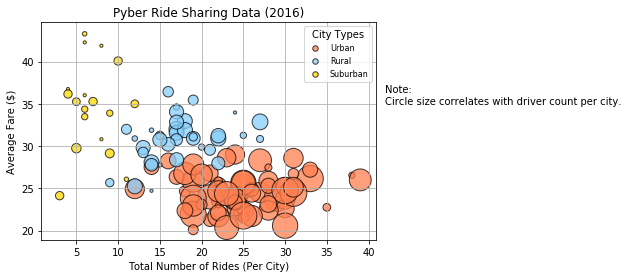

In [2]:
# Create dataframes to segment city types
urban_type = pyber_df[pyber_df["type"]=="Urban"].groupby([pyber_df["city"]])
suburban_type = pyber_df[pyber_df["type"]=="Suburban"].groupby([pyber_df["city"]])
rural_type = pyber_df[pyber_df["type"]=="Rural"].groupby([pyber_df["city"]])

# Obtain the x (ride count) and y (average ride fare) coordinates for each of the three city types
urban_ride_count = urban_type["ride_id"].count()
suburban_ride_count = suburban_type["ride_id"].count()
rural_ride_count = rural_type["ride_id"].count()

urban_average_fare = urban_type["fare"].mean()
suburban_average_fare = suburban_type["fare"].mean()
rural_average_fare = rural_type["fare"].mean()

urban_driver_count = urban_type["driver_count"].mean()
suburban_driver_count = suburban_type["driver_count"].mean()
rural_driver_count = rural_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_ride_count, urban_average_fare, label="Urban", s=urban_driver_count*10, 
            color="coral", edgecolor="black", alpha=0.75, marker="o")
plt.scatter(suburban_ride_count, suburban_average_fare, label="Rural", s=suburban_driver_count*10,
            color="lightskyblue", edgecolor="black", alpha=0.75, marker="o")
plt.scatter(rural_ride_count, rural_average_fare, label="Suburban", s=rural_driver_count*10,
            color="gold", edgecolor="black", alpha=0.75, marker="o")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize=8, title="City Types", loc="upper right")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig("PyberRideSharePlotIZP.png", bbox_inches="tight")

### Total Fares by City Type

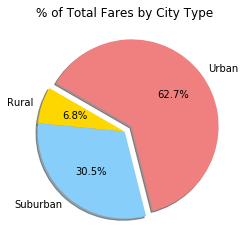

In [3]:
# Calculate Type Percents
city_type_groups = pyber_df.groupby(["type"])
total_fares = city_type_groups["fare"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresByCityTypeIZP.png")

### Total Rides by City Type

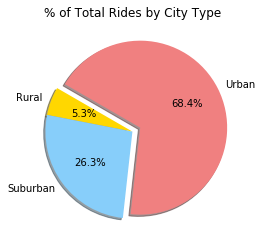

In [4]:
# Calculate Ride Percents
total_ride_count = city_type_groups["ride_id"].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesByCityTypeIZP.png")

### Total Drivers by City Type

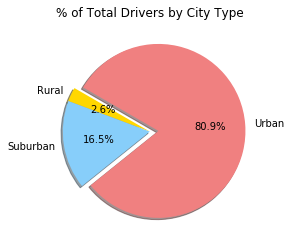

In [5]:
# Calculate Ride Percents
city_type_groups_drivers = city_data_df.groupby(["type"])
total_driver_count = city_type_groups_drivers["driver_count"].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_driver_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversByCityTypeIZP.png")